# ECON 323 Final Project 
# Canada COVID-19 Case and Vaccination Progress and Prediction
Mingyang Ye

Student Number: 87216792

## Bckground
- COVID-19, also known as Corona virus, is an contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease has since spread worldwide, leading to an ongoing pandemic. It can be spread through a close contact with an infected person. ([Wiki](https://en.wikipedia.org/wiki/COVID-19_pandemic))
- The common symptoms of COVID-19 are fever, dry cough and tiredness. The preventive measures to reduce the chances of infection include staying at home, wearing a mask in public, avoiding crowded places, keeping distance from others. ([Wiki](https://en.wikipedia.org/wiki/COVID-19_pandemic))
- For now, Canada now has three major approved COVID-19 vaccines, named Moderna, Pfizer-BioNTech and AstraZeneca. These three vaccines requires two doses, a number of weeks apart to get full efficacy. 
- Data for Canada Statstics from [covid19tracker.ca](https://docs.google.com/spreadsheets/d/1PjkemMdFSZgA-M8Esr6rbNjHiyfcXcBxPeMjselJIso/edit?usp=sharing), it gathers data from [Canada offical government website](https://covid19tracker.ca/vacsources.html) from 2020-01-25 to 2021-04-19.
- Covid19tracker also use this [interactive website](https://covid19tracker.ca/) to display the data.

## Purpose
- Since the vaccines for COVID-19 are gradually produced in some countries, this project aims to visualize the COVID-19 confirmed cases trend and vaccination progress in the Canada.
- another goal is to investiagte vaccination progress in each province in Canada to predict the vaccinated rate that each province will have in a specific data, for example, to forcast if the  the university can safely repoen by September 2021.

## Import Libries

In [20]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import qeds
from sklearn import (
    linear_model, metrics, neural_network, pipeline,
    model_selection, tree, ensemble
)

ConnectionError: HTTPSConnectionPool(host='api.census.gov', port=443): Max retries exceeded with url: /data.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f939b991dc0>: Failed to establish a new connection: [Errno 60] Operation timed out'))

## Read DataSet

In [78]:
xls = pd.ExcelFile("COVID19TrackerCanada.xlsx")
# read national data
national = pd.read_excel(xls, "National")

# read data of each province
ON = pd.read_excel(xls, "ON")
QC = pd.read_excel(xls, "QC")
BC = pd.read_excel(xls, "BC")
AB = pd.read_excel(xls, "AB")
SK = pd.read_excel(xls, "SK")
MB = pd.read_excel(xls, "MB")
NS = pd.read_excel(xls, "NS")
NL = pd.read_excel(xls, "NL")
NB = pd.read_excel(xls, "NB")
PE = pd.read_excel(xls, "PE")
NT = pd.read_excel(xls, "NT")
NU = pd.read_excel(xls, "NU")
YT = pd.read_excel(xls, "YT")

In [80]:
# look at Canada COVID-19 national data
national

,province,last_updated,data » date,data » change_cases,data » change_fatalities,data » change_tests,data » change_hospitalizations,data » change_criticals,data » change_recoveries,data » change_vaccinations,...,data » change_vaccines_distributed,data » total_cases,data » total_fatalities,data » total_tests,data » total_hospitalizations,data » total_criticals,data » total_recoveries,data » total_vaccinations,data » total_vaccinated,data » total_vaccines_distributed
0,All,2021-04-19 18:04:03,2020-01-25,1.0,0.0,2,0,0,0,0,...,NaN,1,0,2,0,0,0,0,NaN,NaN
1,NaN,NaT,2020-01-26,1.0,0.0,4,0,0,0,0,...,NaN,2,0,6,0,0,0,0,NaN,NaN
2,NaN,NaT,2020-01-27,NaN,NaN,20,0,0,0,0,...,NaN,2,0,26,0,0,0,0,NaN,NaN
3,NaN,NaT,2020-01-28,1.0,0.0,10,0,0,0,0,...,NaN,3,0,36,0,0,0,0,NaN,NaN
4,NaN,NaT,2020-01-29,NaN,NaN,3,0,0,0,0,...,NaN,3,0,39,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,NaN,NaT,2021-04-15,9590.0,54.0,150197,45,20,6528,306442,...,1173622.0,1104719,23485,29911405,3766,1117,998515,9205307,854586.0,12643882.0
447,NaN,NaT,2021-04-16,9354.0,46.0,146613,45,61,7697,320425,...,10128.0,1114073,23531,30058018,3811,1178,1006212,9525732,884012.0,12654010.0
448,NaN,NaT,2021-04-17,7695.0,41.0,123382,159,35,6711,254177,...,0.0,1121768,23572,30181400,3970,1213,1012923,9779909,908060.0,12654010.0
449,NaN,NaT,2021-04-18,9103.0,38.0,114428,40,24,4561,200717,...,0.0,1130871,23610,30295828,4010,1237,1017484,9980626,913214.0,12654010.0


In [81]:
# check missing value of data
national.isna().sum()

province                              450
last_updated                          450
data » date                             0
data » change_cases                    22
data » change_fatalities               22
data » change_tests                     0
data » change_hospitalizations          0
data » change_criticals                 0
data » change_recoveries                0
data » change_vaccinations              0
data » change_vaccinated              324
data » change_vaccines_distributed    315
data » total_cases                      0
data » total_fatalities                 0
data » total_tests                      0
data » total_hospitalizations           0
data » total_criticals                  0
data » total_recoveries                 0
data » total_vaccinations               0
data » total_vaccinated               348
data » total_vaccines_distributed     323
dtype: int64

In [82]:
#rename variable
national = national.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});

ON = ON.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
QC = QC.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
BC = BC.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
AB = AB.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
SK = SK.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
MB = MB.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
NS = NS.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
NL = NL.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
NB = NB.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
PE = PE.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
NT = NT.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
NU = NU.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
YT = YT.rename(columns={"data » date": "date", "data » change_cases": "change_cases", "data » change_fatalities": "change_fatalities", "data » change_tests": "change_tests", "data » change_hospitalizations": "change_hospitalizations", "data » change_criticals": "change_criticals", "data » change_recoveries": "change_recoveries", "data » change_vaccinations": "change_vaccinations", "data » change_vaccinated":"change_vaccinated", "data » change_vaccines_distributed": "change_vaccines_distributed", "data » total_cases": "total_cases", 
                                        "data » total_fatalities": "total_fatalities", "data » total_tests": "total_tests", "data » total_hospitalizations": "total_hospitalizations", "data » total_criticals": "total_criticals", "data » total_recoveries": "total_recoveries", "data » total_vaccinations": "total_vaccinations", "data » total_vaccinated":"total_vaccinated", "data » total_vaccines_distributed":"total_vaccines_distributed"});
#Display national
national


,province,last_updated,date,change_cases,change_fatalities,change_tests,change_hospitalizations,change_criticals,change_recoveries,change_vaccinations,...,change_vaccines_distributed,total_cases,total_fatalities,total_tests,total_hospitalizations,total_criticals,total_recoveries,total_vaccinations,total_vaccinated,total_vaccines_distributed
0,All,2021-04-19 18:04:03,2020-01-25,1.0,0.0,2,0,0,0,0,...,NaN,1,0,2,0,0,0,0,NaN,NaN
1,NaN,NaT,2020-01-26,1.0,0.0,4,0,0,0,0,...,NaN,2,0,6,0,0,0,0,NaN,NaN
2,NaN,NaT,2020-01-27,NaN,NaN,20,0,0,0,0,...,NaN,2,0,26,0,0,0,0,NaN,NaN
3,NaN,NaT,2020-01-28,1.0,0.0,10,0,0,0,0,...,NaN,3,0,36,0,0,0,0,NaN,NaN
4,NaN,NaT,2020-01-29,NaN,NaN,3,0,0,0,0,...,NaN,3,0,39,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,NaN,NaT,2021-04-15,9590.0,54.0,150197,45,20,6528,306442,...,1173622.0,1104719,23485,29911405,3766,1117,998515,9205307,854586.0,12643882.0
447,NaN,NaT,2021-04-16,9354.0,46.0,146613,45,61,7697,320425,...,10128.0,1114073,23531,30058018,3811,1178,1006212,9525732,884012.0,12654010.0
448,NaN,NaT,2021-04-17,7695.0,41.0,123382,159,35,6711,254177,...,0.0,1121768,23572,30181400,3970,1213,1012923,9779909,908060.0,12654010.0
449,NaN,NaT,2021-04-18,9103.0,38.0,114428,40,24,4561,200717,...,0.0,1130871,23610,30295828,4010,1237,1017484,9980626,913214.0,12654010.0


In [84]:
# fill 0 with missing value except the province and last updated
national.fillna({"province":"All", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)

ON.fillna({"province":"on", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True
BC.fillna({"province":"bc", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
QC.fillna({"province":"qc", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
AB.fillna({"province":"ab", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
SK.fillna({"province":"sk", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
MB.fillna({"province":"mb", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
NS.fillna({"province":"ns", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
NL.fillna({"province":"nl", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
NB.fillna({"province":"nb", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
PE.fillna({"province":"pe", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
NT.fillna({"province":"nt", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
NU.fillna({"province":"nu", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)
YT.fillna({"province":"yt", "change_cases":0, "change_fatalities": 0, "change_vaccinated": 0, 
                "change_vaccines_distributed": 0, "total_vaccinated":0, "total_vaccines_distributed":0}, inplace=True)

national


,province,last_updated,date,change_cases,change_fatalities,change_tests,change_hospitalizations,change_criticals,change_recoveries,change_vaccinations,...,change_vaccines_distributed,total_cases,total_fatalities,total_tests,total_hospitalizations,total_criticals,total_recoveries,total_vaccinations,total_vaccinated,total_vaccines_distributed
0,All,2021-04-19 18:04:03,2020-01-25,1.0,0.0,2,0,0,0,0,...,0.0,1,0,2,0,0,0,0,0.0,0.0
1,All,NaT,2020-01-26,1.0,0.0,4,0,0,0,0,...,0.0,2,0,6,0,0,0,0,0.0,0.0
2,All,NaT,2020-01-27,0.0,0.0,20,0,0,0,0,...,0.0,2,0,26,0,0,0,0,0.0,0.0
3,All,NaT,2020-01-28,1.0,0.0,10,0,0,0,0,...,0.0,3,0,36,0,0,0,0,0.0,0.0
4,All,NaT,2020-01-29,0.0,0.0,3,0,0,0,0,...,0.0,3,0,39,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,All,NaT,2021-04-15,9590.0,54.0,150197,45,20,6528,306442,...,1173622.0,1104719,23485,29911405,3766,1117,998515,9205307,854586.0,12643882.0
447,All,NaT,2021-04-16,9354.0,46.0,146613,45,61,7697,320425,...,10128.0,1114073,23531,30058018,3811,1178,1006212,9525732,884012.0,12654010.0
448,All,NaT,2021-04-17,7695.0,41.0,123382,159,35,6711,254177,...,0.0,1121768,23572,30181400,3970,1213,1012923,9779909,908060.0,12654010.0
449,All,NaT,2021-04-18,9103.0,38.0,114428,40,24,4561,200717,...,0.0,1130871,23610,30295828,4010,1237,1017484,9980626,913214.0,12654010.0


In [85]:
# check national again
national.isna().sum()

province                         0
last_updated                   450
date                             0
change_cases                     0
change_fatalities                0
change_tests                     0
change_hospitalizations          0
change_criticals                 0
change_recoveries                0
change_vaccinations              0
change_vaccinated                0
change_vaccines_distributed      0
total_cases                      0
total_fatalities                 0
total_tests                      0
total_hospitalizations           0
total_criticals                  0
total_recoveries                 0
total_vaccinations               0
total_vaccinated                 0
total_vaccines_distributed       0
dtype: int64

In [86]:
# combine all dataset
data = pd.concat([national, ON, QC, BC, AB, SK, MB, NS, NL, NB, PE, NT, NU, YT], ignore_index=True)
data

,province,last_updated,date,change_cases,change_fatalities,change_tests,change_hospitalizations,change_criticals,change_recoveries,change_vaccinations,...,change_vaccines_distributed,total_cases,total_fatalities,total_tests,total_hospitalizations,total_criticals,total_recoveries,total_vaccinations,total_vaccinated,total_vaccines_distributed
0,All,2021-04-19 18:04:03,2020-01-25,1.0,0.0,2,0,0,0,0.0,...,0.0,1,0,2,0,0,0,0.0,0.0,0.0
1,All,NaT,2020-01-26,1.0,0.0,4,0,0,0,0.0,...,0.0,2,0,6,0,0,0,0.0,0.0,0.0
2,All,NaT,2020-01-27,0.0,0.0,20,0,0,0,0.0,...,0.0,2,0,26,0,0,0,0.0,0.0,0.0
3,All,NaT,2020-01-28,1.0,0.0,10,0,0,0,0.0,...,0.0,3,0,36,0,0,0,0.0,0.0,0.0
4,All,NaT,2020-01-29,0.0,0.0,3,0,0,0,0.0,...,0.0,3,0,39,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6309,yt,NaT,2021-04-15,0.0,0.0,20,0,0,0,571.0,...,2900.0,76,1,8657,0,0,73,43428.0,18576.0,54300.0
6310,yt,NaT,2021-04-16,0.0,0.0,30,0,0,0,618.0,...,0.0,76,1,8687,0,0,73,44046.0,19125.0,54300.0
6311,yt,NaT,2021-04-17,0.0,0.0,0,0,0,0,0.0,...,0.0,76,1,8687,0,0,73,44046.0,19125.0,54300.0
6312,yt,NaT,2021-04-18,0.0,0.0,0,0,0,0,0.0,...,0.0,76,1,8687,0,0,73,44046.0,19125.0,54300.0


## Investigate the DataSet

In [123]:
# First look at each province and national total for 2021-04-19
data["date"] = pd.to_datetime(data["date"])
total = pd.DataFrame(data[data["date"] == "2021-04-19"])
total.drop(total.loc[:, "change_cases":"change_vaccines_distributed"].columns, axis = 1, inplace = True)
total

,province,last_updated,date,total_cases,total_fatalities,total_tests,total_hospitalizations,total_criticals,total_recoveries,total_vaccinations,total_vaccinated,total_vaccines_distributed
450,All,NaT,2021-04-19,1139605,23651,30421482,4145,1262,1028769,10243418.0,933026.0,12670210.0
901,on,NaT,2021-04-19,429280,7719,13462948,2202,755,379841,3904778.0,346005.0,4852885.0
1352,qc,NaT,2021-04-19,338044,10816,8186588,686,183,314376,2399934.0,32000.0,2836485.0
1803,bc,NaT,2021-04-19,120040,1538,2405539,441,138,108919,1380160.0,88151.0,1696370.0
2254,ab,NaT,2021-04-19,172186,2043,3967736,460,104,151719,1165223.0,233340.0,1449695.0
2705,sk,NaT,2021-04-19,38401,465,731589,200,43,35310,352169.0,42871.0,396475.0
3156,mb,NaT,2021-04-19,36267,959,624868,132,30,33623,341926.0,69822.0,486810.0
3607,ns,NaT,2021-04-19,1822,67,468372,2,0,1692,207563.0,32496.0,316500.0
4058,nl,NaT,2021-04-19,1046,6,129832,0,0,1011,136349.0,9674.0,173840.0
4509,nb,NaT,2021-04-19,1797,33,276501,21,8,1605,200587.0,18812.0,255205.0


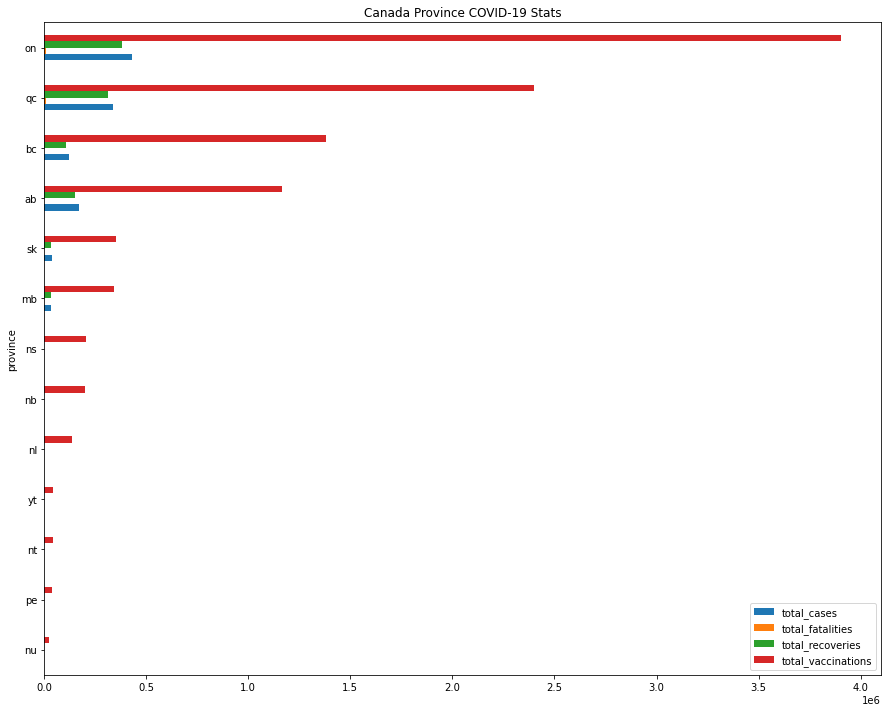

In [140]:
total = total.drop(total[(total.province == "All")].index)
totalStat = total.groupby("province").sum()[['total_cases','total_fatalities','total_recoveries','total_vaccinations']]
totalStat = totalStat.sort_values(["total_vaccinations"], ascending=True)
totalStat.plot(xlabel = "province", ylabel = "total number", kind = "barh", figsize=(15,12), title="Canada Province COVID-19 Stats")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


## Data Visualization